In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

sp.init_printing()

In [2]:
x = sp.Function('x')
t = sp.Symbol('t', real=True)
omega0 = sp.Symbol('omega_0', positive=True)
omega = sp.Symbol('omega', positive=True)
x0 = sp.Symbol('x_0', real=True)
v0 = sp.Symbol('v_0', real=True)
alpha0 = sp.Symbol('alpha_0', positive=True)
gamma = sp.Symbol('gamma', positive=True)

x(t), t, omega, omega0, x0, v0, alpha0, gamma

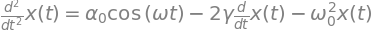

In [5]:
osc_oba = sp.Eq(x(t).diff(t, t), -omega0 ** 2 * x(t) - 2* gamma * x(t).diff(t) + alpha0 * sp.cos(omega * t))
osc_oba

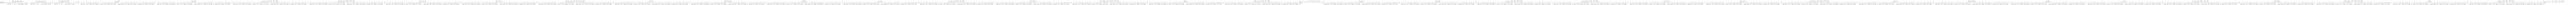

In [7]:
sol = sp.dsolve(osc_oba, x(t), ics={x(0): x0, x(t).diff(t).subs(t, 0): v0})
sol

In [10]:
ver1 = sp.lambdify(t, sol.rhs.subs({omega: 4, omega0: 6, x0: 1.0, v0: 1, alpha0: 85, gamma: 0.1}))
ver2 = sp.lambdify(t, sol.rhs.subs({omega: 1, omega0: 1.02, x0: 1.0, v0: 1, alpha0: 3.14, gamma: 0.5}))
ver3 = sp.lambdify(t, sol.rhs.subs({omega: 3, omega0: 5.7, x0: 1.0, v0: 6, alpha0: 7, gamma: 1}))

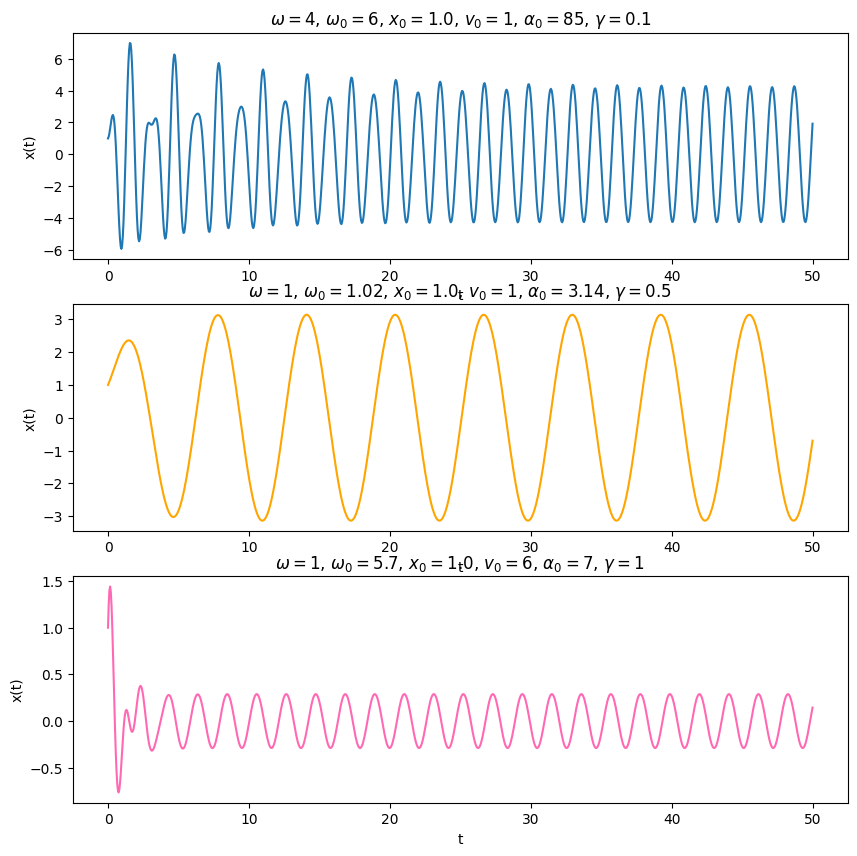

In [12]:
time_plot = np.linspace(0, 50, 1000)
plt.figure(figsize=(10, 10))
plt.subplot(311)
plt.plot(time_plot, ver1(time_plot))
plt.title('$\omega = 4$, $\omega_0 = 6$, $x_0 = 1.0$, $v_0 = 1$, $\\alpha_0 = 85$, $\gamma = 0.1$')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.subplot(312)
plt.title('$\omega = 1$, $\omega_0 = 1.02$, $x_0 = 1.0$, $v_0 = 1$, $\\alpha_0 = 3.14$, $\gamma = 0.5$')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.plot(time_plot, ver2(time_plot), c='orange')
plt.subplot(313)
plt.title('$\omega = 1$, $\omega_0 = 5.7$, $x_0 = 1.0$, $v_0 = 6$, $\\alpha_0 = 7$, $\gamma = 1$')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.plot(time_plot, ver3(time_plot), c='hotpink')